In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
wine_dataset=pd.read_csv("winequality-red.csv")

In [3]:
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

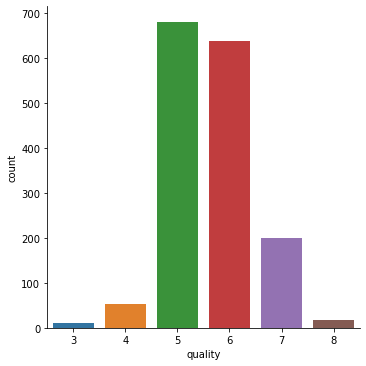

In [6]:
sns.catplot(x='quality',data=wine_dataset,kind='count')

In [7]:
wine_dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

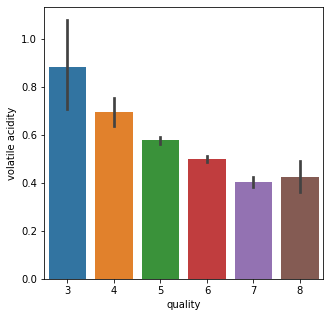

In [8]:
#volatile acidity V/s Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

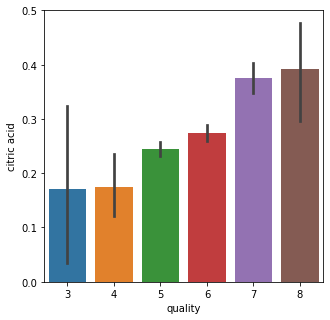

In [9]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wine_dataset)

In [10]:
correlation=wine_dataset.corr()

<AxesSubplot:>

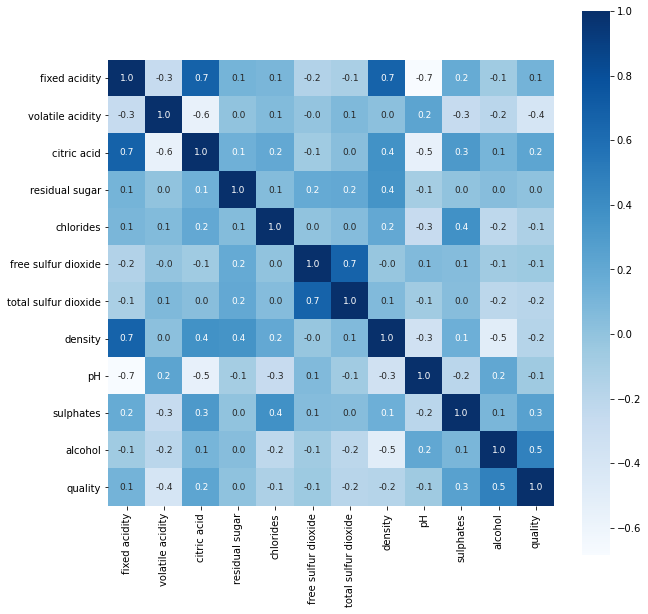

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

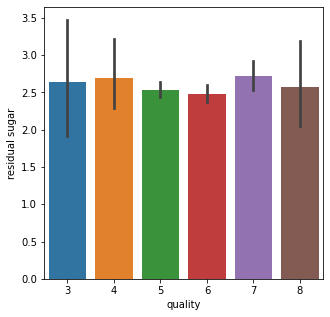

In [12]:
#residualsugar vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar',data=wine_dataset)

In [13]:
X=wine_dataset.drop('quality',axis=1)


In [14]:
print(X)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [15]:
#label binarization (or label encoding)
y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>7 else 0)

In [16]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [18]:
RF=RandomForestClassifier()

In [19]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
#accuracy score for train
X_train_predict=RF.predict(X_train)
aaaaaah=accuracy_score(X_train_predict,y_train)
aaaaaah

1.0

In [21]:
#accuracy score for test set
X_test_predict=RF.predict(X_test)
acc=accuracy_score(X_test_predict,y_test)
acc

0.996875

In [22]:
def data(input_data):
    input_data_array=np.asarray(input_data)
    reshape_array=input_data_array.reshape(1,-1)
    
    prediction=RF.predict(reshape_array)
    if prediction[0]==1:
        print("noice")
    
    else:
        print("not noice")

    





In [29]:
data([X.iloc[0]])
X.iloc[0] 

not noice


fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
Name: 0, dtype: float64